# Forests of randomized trees
Some References:
- https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Data Preprocessing
- Removing outliers of price
- Apply categorial label

In [15]:
london = pd.read_csv('london_weekdays.csv')
london = london.drop(columns=['Unnamed: 0'])

In [16]:
#To remove outliers from realSum 
# Calculate the quartiles
Q1 = london['realSum'].quantile(0.25)
Q3 = london['realSum'].quantile(0.75)

# Remove outliers of realSum
london = london.loc[((london['realSum'] > (Q1 - 1.5 * (Q3 - Q1))) & (london['realSum'] < (Q3 + 1.5 * (Q3 - Q1))))]
london.shape

(4367, 19)

In [17]:
#Apply categorical label to columns 
london[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']].apply(lambda x: x.astype('category'))

#Convert Roomtype to oridinal 
london["room_type"] = london["room_type"].replace({'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2})
london.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,2,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,1,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,1,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,1,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,1,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


### Split Data

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [36]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(london["realSum"])
x = pd.DataFrame(london[["person_capacity", "bedrooms", "dist", "metro_dist", "attr_index_norm", "rest_index_norm", "room_type", "biz"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3493, 8)
(874, 8)
(3493, 1)
(874, 1)


In [37]:
x_train.head()

,person_capacity,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type,biz
2800,2.0,1,7.138331,2.922748,11.343655,6.384881,1,0
1889,2.0,1,2.609117,0.191979,39.403497,18.680921,2,0
3624,2.0,1,6.937369,2.298633,12.603799,6.297052,1,0
1548,6.0,2,4.133462,0.848886,19.429453,11.447779,2,1
289,4.0,1,4.671532,0.379237,19.196102,11.905796,2,1


### Train and Test

In [42]:
# create regressor object
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
model.fit(x, y)

#Prediction using test data set 
y_test_pred = model.predict(x_test)

C:\Users\long\AppData\Local\Temp\ipykernel_284\76617234.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9612270537278284
Mean Squared Error (MSE) 	: 1097.7956781594655



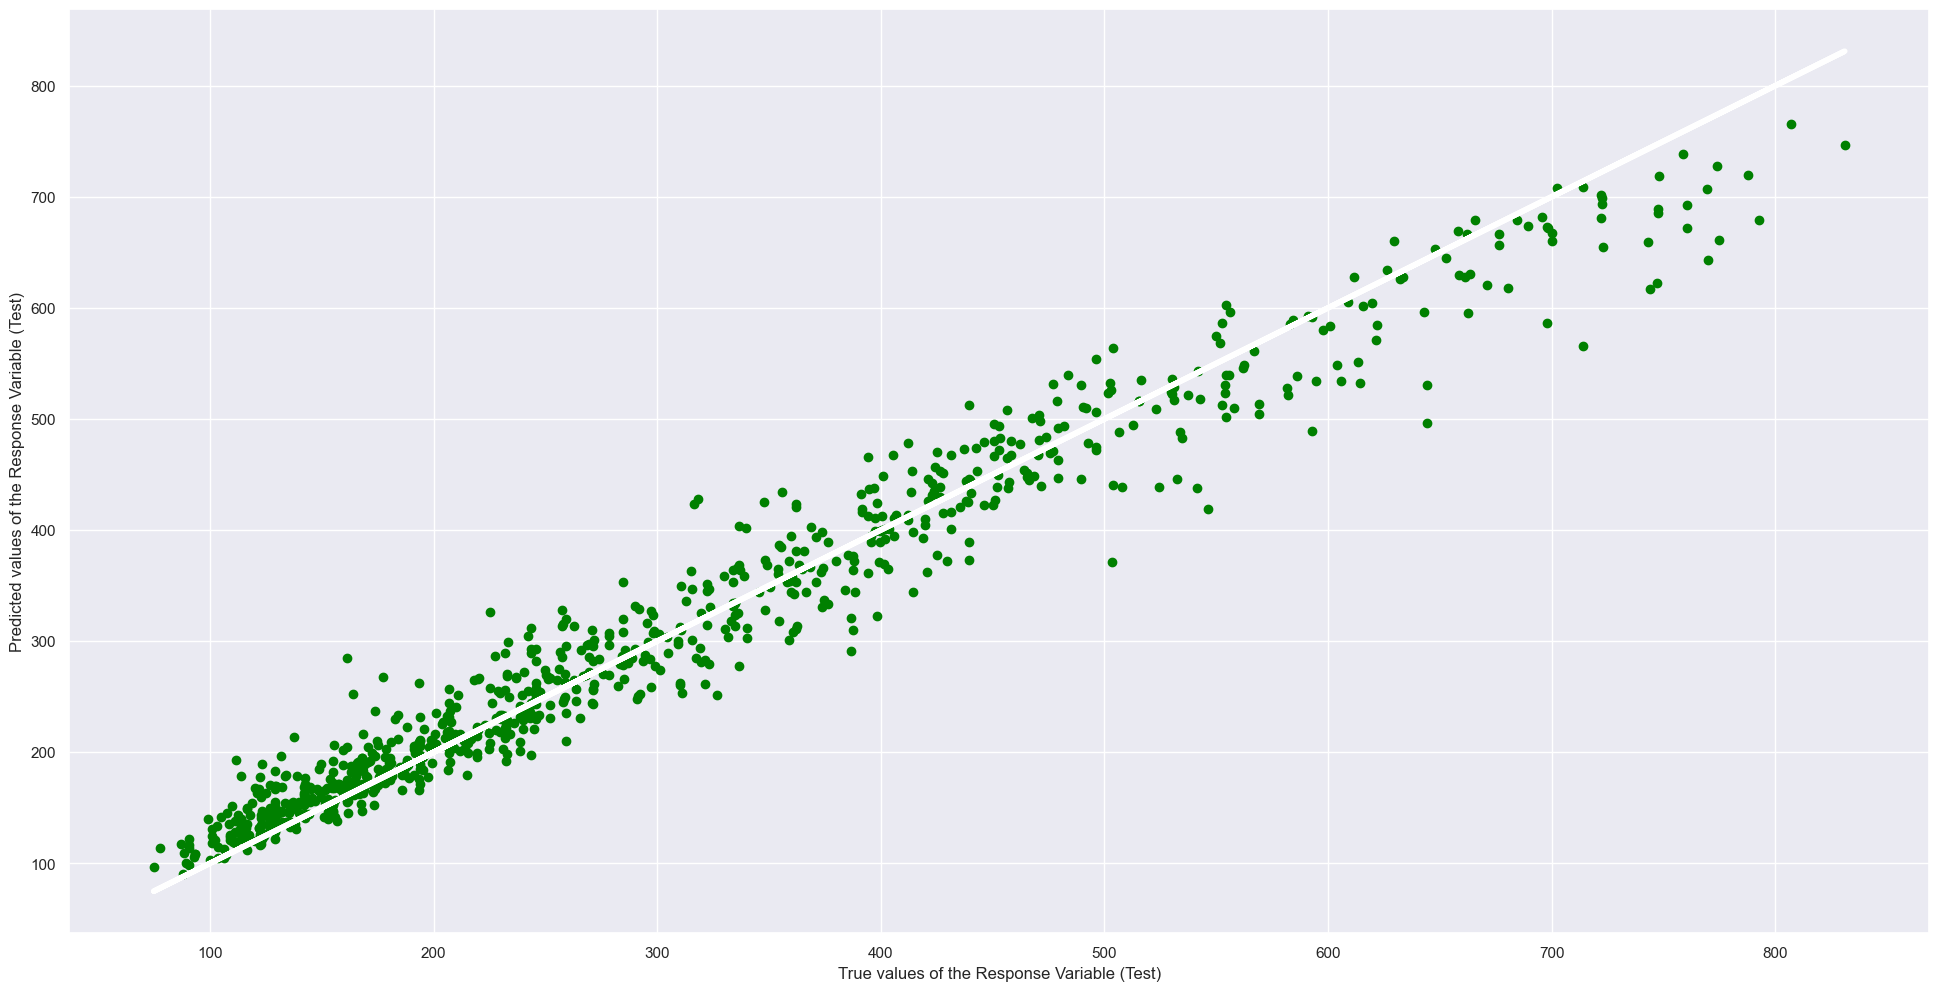

In [45]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_test, y_test_pred, color = "green")
axes.plot(y_test, y_test, 'w-', linewidth = 4)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [99]:
df = pd.DataFrame(london, index=x_test.index)
y_pred_df = pd.DataFrame(y_test_pred, index=x_test.index)
y_pred_df.columns = ['predSum']
df = pd.concat([df, y_pred_df], axis=1)
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,predSum
4598,271.408076,1,False,True,4.0,False,1,0,9.0,86.0,2,7.109921,2.000025,161.172704,11.203293,358.742525,6.423584,-0.07121,51.56172,256.706414
642,129.353936,1,False,True,2.0,False,0,1,10.0,95.0,1,13.929630,4.965348,88.022500,6.118542,180.059539,3.224116,0.06850,51.48184,136.581293
1092,714.268915,1,False,True,2.0,False,1,0,10.0,100.0,1,1.353179,0.399381,624.644063,43.419702,1186.288083,21.241478,-0.10952,51.51300,566.059879
2210,142.289329,1,False,True,2.0,False,0,0,10.0,100.0,1,5.029089,0.203962,216.193326,15.027838,445.937830,7.984889,-0.11739,51.46357,176.949129
1063,200.616195,1,False,True,2.0,False,0,1,9.0,89.0,1,4.046754,0.509605,369.207941,25.664054,1005.596679,18.006048,-0.07219,51.51978,207.688328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,180.389943,1,False,True,2.0,False,0,1,10.0,90.0,1,4.002057,0.372108,439.485759,30.549143,785.487830,14.064815,-0.07019,51.51210,194.769397
778,534.584539,2,False,False,2.0,True,1,0,10.0,96.0,1,3.194646,0.612345,447.493468,31.105768,773.412025,13.848588,-0.08400,51.49900,482.993485
2510,125.120534,1,False,True,2.0,False,1,0,10.0,100.0,1,4.607581,1.959259,245.359024,17.055178,457.913856,8.199330,-0.08372,51.47722,162.818975
4069,252.122580,1,False,True,5.0,False,0,1,7.0,80.0,1,2.025906,0.429054,507.882084,35.303447,1068.515284,19.132658,-0.14056,51.49204,242.715022


In [100]:
underpriced = df.query('realSum < predSum')
overpriced = df.query('realSum > predSum')

In [101]:
underpriced['guest_satisfaction_overall'].mean()

90.06876227897838

In [102]:
overpriced['guest_satisfaction_overall'].mean()

90.71506849315068